# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = merge_df[merge_df["Mouse ID"] == "g989"]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != 'g989']
clean_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats = clean_df.groupby("Drug Regimen")

regimen_mean = regimen_stats["Tumor Volume (mm3)"].mean()
regimen_median = regimen_stats["Tumor Volume (mm3)"].median()
regimen_variance = regimen_stats["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_stats["Tumor Volume (mm3)"].std()
regimen_sem = regimen_stats["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
series_clean = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "St Dev": regimen_stdev, "SEM": regimen_sem})
series_clean


,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_data = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_data.sort_index()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

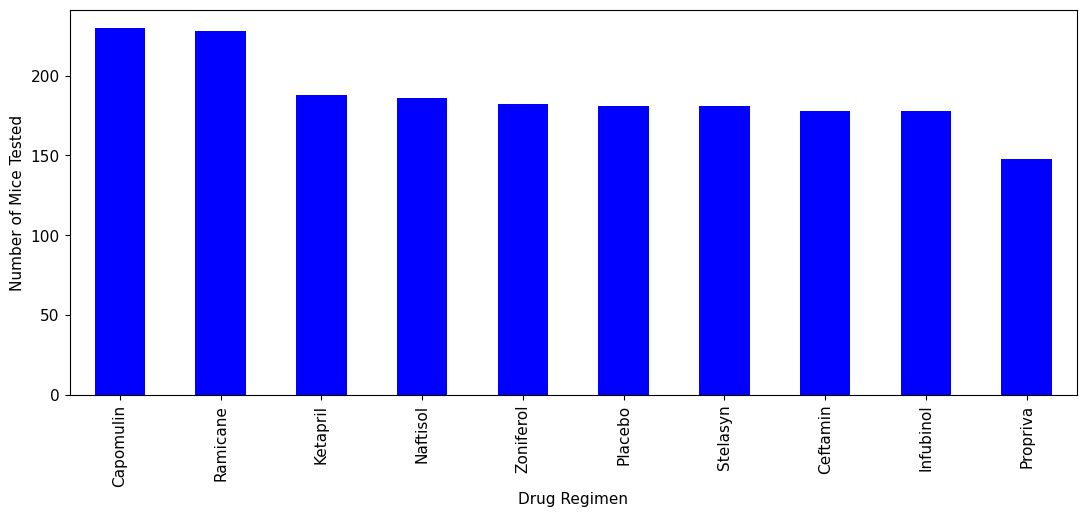

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_stats = clean_df.groupby("Drug Regimen")
mice_tested = regimen_stats["Mouse ID"].count()
mice_tested_sorted = mice_tested.sort_values(ascending=False)


mice_tested_sorted.plot(kind="bar", color = 'blue',figsize=(13,5),fontsize = 11)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice Tested",fontsize = 11)
plt.show()


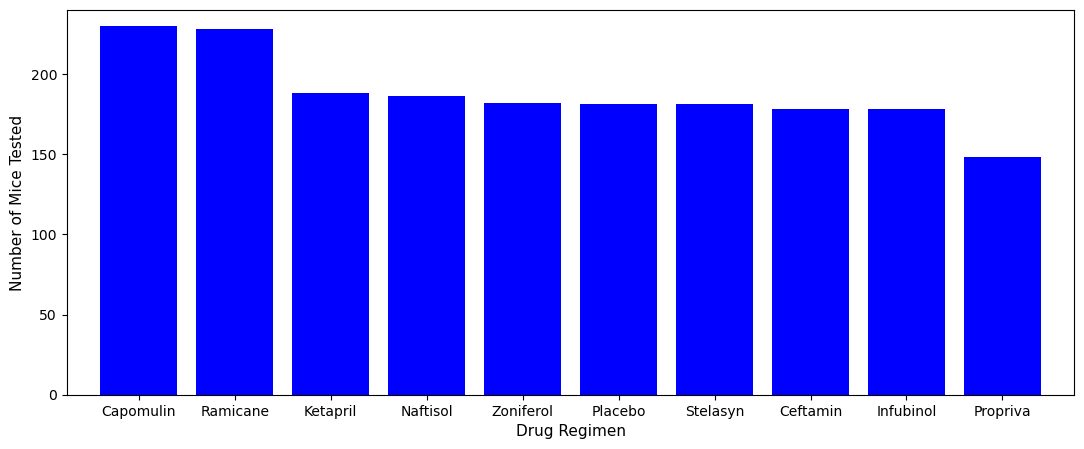

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_tested_sorted.index.values
plt.figure(figsize=(13,5))
plt.bar(x_axis,mice_tested_sorted,color="b", align="center")
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_tested_sorted)+10)
plt.xlabel("Drug Regimen",fontsize = 11)
plt.ylabel("Number of Mice Tested",fontsize = 11)

plt.show()

In [11]:
gender_dist = clean_df.groupby("Sex")
gender_dist.count()

gender_count = gender_dist.count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


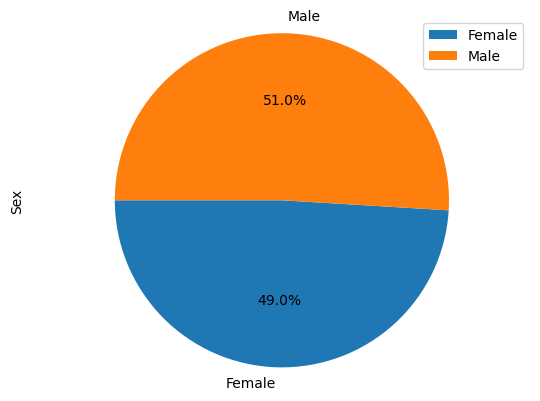

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = gender_count.plot(kind="pie", y='Mouse ID',startangle=180,autopct="%1.1f%%")
gender_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

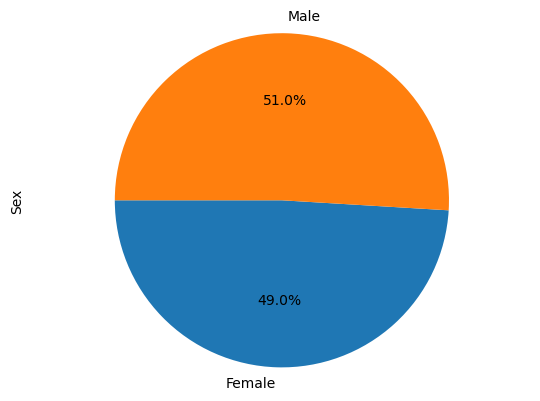

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count["Mouse ID"], labels=gender_count.index, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df_max=capomulin_df.drop_duplicates("Mouse ID", keep="last")
capomulin_df_max

# # # Ramicane
ramicane_df = clean_df[clean_df["Drug Regimen"] == "Ramicane"]
ramicane_df_max=ramicane_df.drop_duplicates("Mouse ID", keep="last")
ramicane_df_max

# # # Infubinol
infubinol_df = clean_df[clean_df["Drug Regimen"] == "Infubinol"]
infubinol_df_max=infubinol_df.drop_duplicates("Mouse ID", keep="last")
infubinol_df_max

# # # Ceftamin
ceftamin_df = clean_df[clean_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df_max=ceftamin_df.drop_duplicates("Mouse ID", keep="last")
ceftamin_df_max


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_merge_df = pd.concat([capomulin_df_max, ramicane_df_max,infubinol_df_max,
                        ceftamin_df_max]).sort_values(["Tumor Volume (mm3)"],ascending = True).reset_index()
drug_merge_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,39,m601,Capomulin,Male,22,17,45,28.430964,1
3,29,x401,Capomulin,Female,16,15,45,28.484033,0
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
95,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
96,463,a203,Infubinol,Female,20,23,45,67.973419,2
97,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
98,1033,k210,Ceftamin,Male,15,28,45,68.923185,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    tumor_vol_by_drug = drug_merge_df['Tumor Volume (mm3)'].loc[drug_merge_df['Drug Regimen'] == drug]
    tumor_volume_data.append(tumor_vol_by_drug)

    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= tumor_vol_by_drug.loc[tumor_vol_by_drug< lower_bound]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 21    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Owner\AppData\Local\Temp\ipykernel_27032\1799790044.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list)


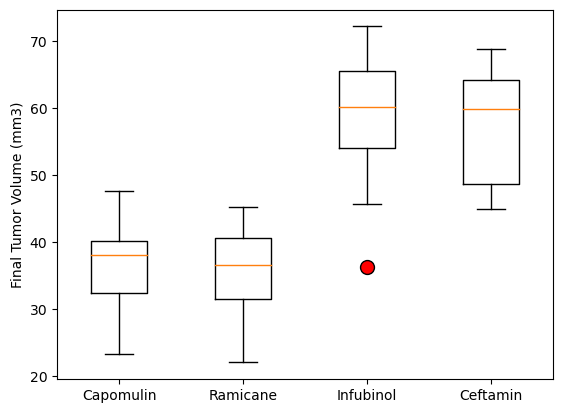

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(drug_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data,flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'Red'})
plt.show()


## Line and Scatter Plots

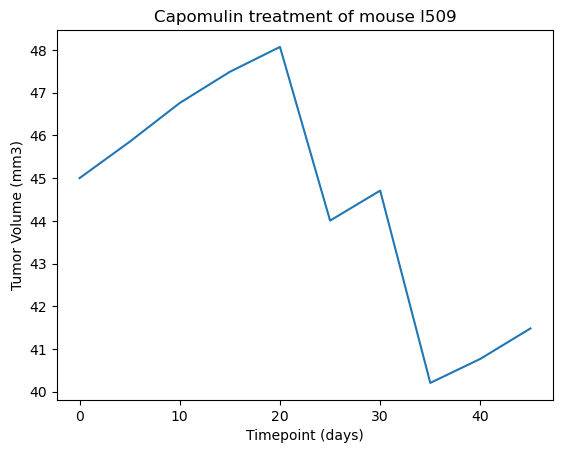

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_df[clean_df["Mouse ID"] == "l509"]
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


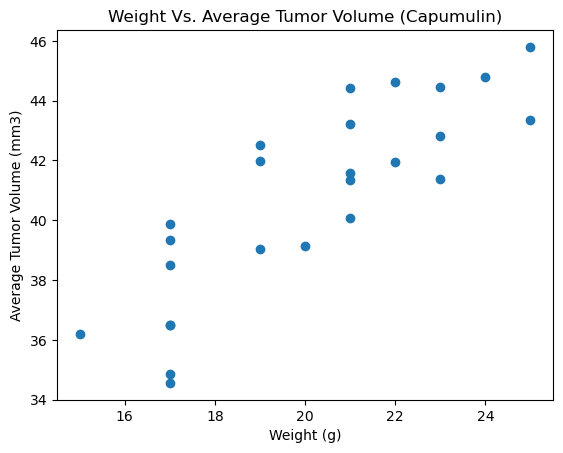

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_regimen
unique_mouse = capomulin_regimen["Mouse ID"].unique()

weight = []

average = []

for mouse in unique_mouse:
    tumor_average = clean_df.loc[clean_df["Mouse ID"] == mouse, "Tumor Volume (mm3)"].mean()
    average.append(tumor_average)
    mouse_weight = clean_df.loc[clean_df["Mouse ID"] == mouse, "Weight (g)"].mean()
    weight.append(mouse_weight)

plt.scatter(weight,average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs. Average Tumor Volume (Capumulin)")


plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,average)[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


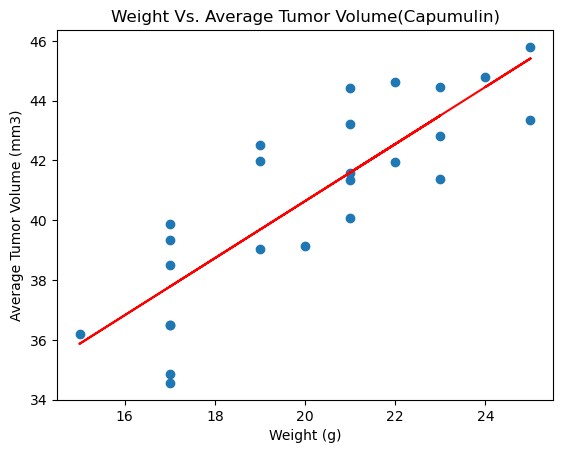

In [23]:
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(weight,average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs. Average Tumor Volume(Capumulin)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average)
reg_values = np.asarray(weight) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,reg_values,"r-")
plt.show()